In [1]:
import pandas as pd
import os
import sys
from datetime import datetime
import re

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
from plotnine import *

In [2]:
df=pd.read_csv('films2021_2022_clean.csv', encoding='utf-8-sig',sep=";")
df

,Titre,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note_spectators,Scenar,...,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year,note_spectator_word,nomi
0,#No_Filter,Epouvante-horreur,Thriller,Michael Dupret,Hannah McIver,Jasmine Daoud,Samuel Van der Zwalmen,NaN,1.6,NaN,...,Anglais,0.0,0.0,0.0,87,5,mai,2023,bad,0
1,13 : La comédie musicale,Drame,Famille,Tamra Davis,Eli Golden,Josh Peck,Debra Messing,NaN,2.6,Robert Horn,...,Anglais,1.0,0.0,0.0,94,12,août,2022,soso,0
2,16 ans,Drame,Romance,Philippe Lioret,Sabrina Levoye,Teïlo Azaïs,Jean-Pierre Lorit,"3,2",3.6,Philippe Lioret,...,Français,4.0,0.0,0.0,94,4,janvier,2023,good,1
3,1UP,Comédie,NaN,Kyle Newman,Paris Berelc,Taylor Zakhar Perez,Ruby Rose,NaN,2.2,Julia Yorks,...,Anglais,0.0,0.0,0.0,100,15,juillet,2022,soso,0
4,365 jours : Au lendemain,Drame,Erotique,Barbara Bialowas,Michele Morrone,Anna-Maria Sieklucka,Simone Susinna,NaN,1.2,Tomasz Mandes,...,Anglais,0.0,0.0,0.0,106,27,avril,2022,bad,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,Xtreme,Action,Policier,Daniel Benmayor,Teo García,Óscar Jaenada,Oscar Casas,NaN,2.7,Iván Ledesma,...,Espagnol,0.0,0.0,0.0,111,4,juin,2021,soso,0
2174,Yakuza Princess,Arts Martiaux,Thriller,Vicente Amorim,MASUMI,Jonathan Rhys-Meyers,Tsuyoshi Ihara,NaN,2.1,Vicente Amorim,...,Anglais,1.0,0.0,1.0,111,15,janvier,2022,soso,0
2175,Yara,Policier,Drame,Marco Tullio Giordana,Isabella Ragonese,Alessio Boni,Thomas Trabacchi,NaN,3.2,Graziano Diana,...,Italien,2.0,0.0,0.0,94,5,novembre,2021,good,0
2176,Yes Day,Comédie,Famille,Miguel Arteta,Jennifer Garner,Édgar Ramírez,Jenna Ortega,NaN,2.4,Justin Malen,...,Anglais,10.0,1.0,2.0,86,12,mars,2021,soso,0


In [3]:
#Analysis by nationality

#Number films by country on the years 2022 and 2021
df.nationality_1.value_counts()

U.S.A.                 727
France                 453
Inde                   156
Grande-Bretagne         94
Allemagne               66
                      ... 
Barbade                  1
Emirats Arabes Unis      1
Tanzanie                 1
Bénin                    1
Serbie                   1
Name: nationality_1, Length: 81, dtype: int64

In [4]:
#To have it in percentage
normalized_natio = df.nationality_1.value_counts(normalize=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 [Text(0, 0, 'U.S.A.'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Inde'),
  Text(3, 0, 'Grande-Bretagne'),
  Text(4, 0, 'Allemagne'),
  Text(5, 0, 'Italie'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Espagne'),
  Text(8, 0, 'Japon'),
  Text(9, 0, 'Pologne'),
  Text(10, 0, 'Belgique'),
  Text(11, 0, 'Corée du Sud'),
  Text(12, 0, 'Turquie'),
  Text(13, 0, 'Mexique'),
  Text(14, 0, 'Brésil'),
  Text(15, 0, 'Australie'),
  Text(16, 0, 'Suède'),
  Text(17, 0, 'Indonésie'),
  Text(18, 0, 'Russie'),
  Text(19, 0, 'Suisse'),
  Text(20, 0, 'Afrique du Sud'),
  Text(21, 0, 'Argentine'),
  Text(22, 0, 'Danemark'),
  Text(23, 0, 'Chine'),
  Text

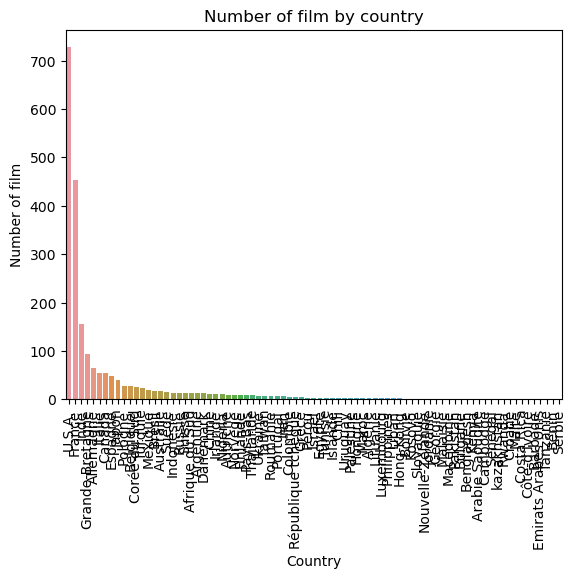

In [5]:
sn.barplot(x=df.nationality_1.value_counts().index, y=df.nationality_1.value_counts().values)
plt.title("Number of film by country")
plt.xlabel("Country")
plt.ylabel("Number of film")
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=5) 
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 [Text(0, 0, 'U.S.A.'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Inde'),
  Text(3, 0, 'Grande-Bretagne'),
  Text(4, 0, 'Allemagne'),
  Text(5, 0, 'Italie'),
  Text(6, 0, 'Canada'),
  Text(7, 0, 'Espagne'),
  Text(8, 0, 'Japon'),
  Text(9, 0, 'Pologne'),
  Text(10, 0, 'Belgique'),
  Text(11, 0, 'Corée du Sud'),
  Text(12, 0, 'Turquie'),
  Text(13, 0, 'Mexique'),
  Text(14, 0, 'Brésil'),
  Text(15, 0, 'Australie'),
  Text(16, 0, 'Suède'),
  Text(17, 0, 'Indonésie'),
  Text(18, 0, 'Russie'),
  Text(19, 0, 'Suisse'),
  Text(20, 0, 'Afrique du Sud'),
  Text(21, 0, 'Argentine'),
  Text(22, 0, 'Danemark'),
  Text(23, 0, 'Chine'),
  Text

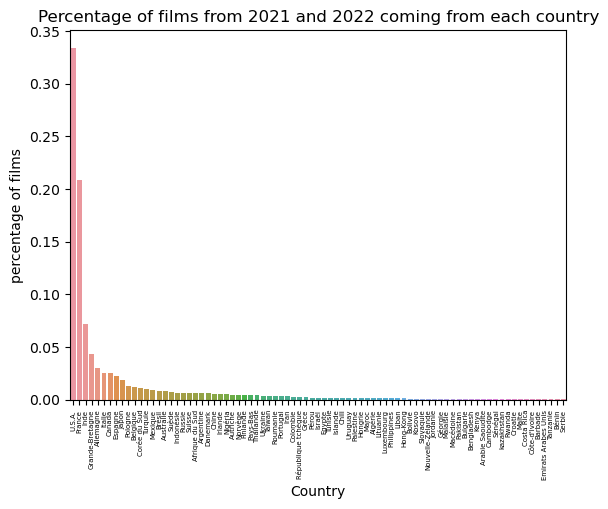

In [6]:
sn.barplot(x=normalized_natio.index, y=normalized_natio.values)
plt.title("Percentage of films from 2021 and 2022 coming from each country")
plt.xlabel("Country")
plt.ylabel("percentage of films")
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=5) 
plt.xticks(rotation='vertical')

We will now try to make some map to make the information with the countries more visual

In [7]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\User\AppData\Local\Temp\ipykernel_318132\3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.


In [10]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [11]:
world=world.drop(["pop_est","continent","iso_a3","gdp_md_est"], axis=1)

In [12]:
world

,name,geometry
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Montenegro,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Kosovo,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Trinidad and Tobago,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [13]:
df_sans_NA=df.dropna(axis=0, subset=['nationality_1']).reset_index(drop=True)

<AxesSubplot:>

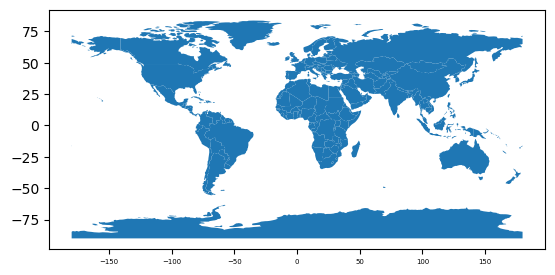

In [33]:
world.plot()

In [15]:
world=world.sort_values('name')

In [16]:
world.name.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile',
       'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark',
       'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador',
       'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.',
       'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 

In [58]:
df_sans_NA["nationality_1"].unique()

array(['Belgique', 'U.S.A.', 'France', 'Canada', 'Pologne', 'Suisse',
       'Allemagne', 'Norvège', 'Espagne', 'Corée du Sud', 'Inde',
       'Grande-Bretagne', 'Turquie', 'Israël', 'Portugal',
       'Afrique du Sud', 'Nigéria', 'Grèce', 'Argentine', 'Tunisie',
       'Iran', 'Mexique', 'Pérou', 'Suède', 'Italie', 'Géorgie', 'Japon',
       'Ukraine', 'Chili', 'Autriche', 'Kenya', 'Philippines',
       'Costa Rica', 'Islande', 'Finlande', 'Danemark', 'Pays-Bas',
       'Russie', 'Thaïlande', 'Palestine', 'Irlande', 'Bengladesh',
       'Bulgarie', 'Taïwan', 'Australie', 'Pakistan', 'Colombie',
       'Macédoine', 'Algérie', 'Bénin', 'Chine', 'Brésil', 'Malaisie',
       'République tchèque', 'Liban', 'Barbade', 'Indonésie', 'Roumanie',
       'Arabie Saoudite', 'Egypte', 'Uruguay', 'Lituanie', 'Hong-Kong',
       'Slovaquie', 'Nouvelle-Zélande', 'Tanzanie', 'Maroc',
       'Emirats Arabes Unis', 'Hongrie', 'Jordanie', 'Luxembourg',
       'Kosovo', 'Bolivie', "Côte-d'Ivoire", 'Cambod

In [59]:
df_sans_NA["nationality_1"]=df_sans_NA["nationality_1"].replace({"Belgique":'Belgium','U.S.A.':'United States of America','France':'France', 'Pologne':'Poland'
                                                ,'Suisse':'Switzerland','Allemagne':'Germany','Norvège':'Norway','Espagne':'Spain',
                                                'Corée du Sud':'South Korea','Inde':"India",'Grande-Bretagne':'United Kingdom',
                                                'Turquie':'Turkey','Israël':'Israel','Portugal':'Portugal','Afrique du Sud':'South Africa',
                                                'Nigéria':'Nigeria','Grèce':'Greece','Argentine':'Argentina','Tunisie':'Tunisia','Iran':'Iran',
                                                'Mexique':'Mexico','Pérou':'Peru','Suède':'Sweden','Italie':'Italy','Géorgie':'Georgia',
                                                'Japon':'Japan','Ukraine':'Ukraine','Chili':'Chile','Autriche':'Austria','Kenya':'Kenya',
                                                'Philippines':'Philippines', 'Costa Rica':'Costa Rica','Islande':'Iceland','Finlande':'Finland',
                                                'Danemark':'Denmark','Pays-Bas':'Netherlands','Russie':'Russia','Thaïlande':'Thailand',
                                                'Palestine':'Palestine','Irlande':'Ireland','Bengladesh':'Bangladesh','Bulgarie':'Bulgaria','Taïwan':'Taiwan',
                                                'Australie':'Australia', 'Pakistan':'Pakistan','Colombie':'Colombia', 'Macédoine':'North Macedonia',
                                                 'Algérie':'Algeria', 'Bénin':'Benin', 'Chine':'China', 'Brésil':'Brazil','Malaisie':'Malaysia',
                                                 'République tchèque':'Czechia', 'Liban':'Lebanon', 'Barbade':'United States of America', 'Indonésie':'Indonesia',
                                                'Roumanie':'Romania', 'Arabie Saoudite':'Saudi Arabia', 'Egypte':'Egypt',
                                                 'Uruguay':'Uruguay', 'Lituanie':'Lithuania','Hong-Kong':'China', 'Slovaquie':'Slovakia',
                                                 'Nouvelle-Zélande':'New Zealand', 'Tanzanie':'Tanzania', 'Maroc':'Morocco',
                                                'Emirats Arabes Unis':'United Arab Emirates', 'Hongrie':'Hungary', 'Jordanie':'Jordan',
                                                 'Luxembourg':'Luxembourg','Kosovo':'Kosovo', 'Bolivie':'Bolivia', "Côte-d'Ivoire":"Côte d'Ivoire",
                                                 'Cambodge':'Cambodia', 'Malte':'N. Cyprus','Croatie':'Croatia',
                                                 'Rwanda':'Rwanda', 'kazakhstan':'Kazakhstan', 'Sénégal':'Senegal', 'Serbie':'Serbia'})

In [60]:
df_sans_NA["nationality_1"].unique()

array(['Belgium', 'United States of America', 'France', 'Canada',
       'Poland', 'Switzerland', 'Germany', 'Norway', 'Spain',
       'South Korea', 'India', 'United Kingdom', 'Turkey', 'Israel',
       'Portugal', 'South Africa', 'Nigeria', 'Greece', 'Argentina',
       'Tunisia', 'Iran', 'Mexico', 'Peru', 'Sweden', 'Italy', 'Georgia',
       'Japan', 'Ukraine', 'Chile', 'Austria', 'Kenya', 'Philippines',
       'Costa Rica', 'Iceland', 'Finland', 'Denmark', 'Netherlands',
       'Russia', 'Thailand', 'Palestine', 'Ireland', 'Bangladesh',
       'Bulgaria', 'Taiwan', 'Australia', 'Pakistan', 'Colombia',
       'North Macedonia', 'Algeria', 'Benin', 'China', 'Brazil',
       'Malaysia', 'Czechia', 'Lebanon', 'Indonesia', 'Romania',
       'Saudi Arabia', 'Egypt', 'Uruguay', 'Lithuania', 'Slovakia',
       'New Zealand', 'Tanzania', 'Morocco', 'United Arab Emirates',
       'Hungary', 'Jordan', 'Luxembourg', 'Kosovo', 'Bolivia',
       "Côte d'Ivoire", 'Cambodia', 'N. Cyprus', 'Croatia

In [61]:
value_count=df_sans_NA["nationality_1"].value_counts()

In [62]:
new_df=pd.DataFrame(value_count)

In [63]:
new_df_reset = new_df.reset_index()
new_df_reset.columns = ['country', 'counts'] # change column names

In [64]:
new_df_reset

,country,counts
0,United States of America,728
1,France,453
2,India,156
3,United Kingdom,94
4,Germany,66
...,...,...
74,Benin,1
75,Tanzania,1
76,Costa Rica,1
77,Saudi Arabia,1


In [65]:
geomap= world.merge(new_df_reset,right_on='country', left_on="name")


In [66]:
geomap.sort_values('name')

,name,geometry,country,counts
0,Algeria,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,3
1,Argentina,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,13
2,Australia,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",Australia,18
3,Austria,"POLYGON ((16.97967 48.12350, 16.90375 47.71487...",Austria,10
4,Bangladesh,"POLYGON ((92.67272 22.04124, 92.65226 21.32405...",Bangladesh,2
...,...,...,...,...
74,Ukraine,"POLYGON ((32.15944 52.06125, 32.41206 52.28869...",Ukraine,8
75,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",United Arab Emirates,1
76,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",United Kingdom,94
77,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,728


<AxesSubplot:>

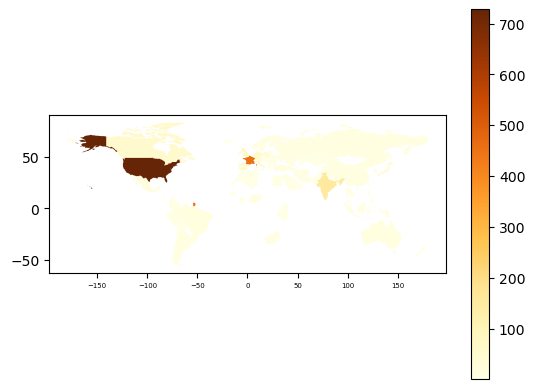

In [67]:
figure=geomap.plot(column="counts", cmap='YlOrBr', legend=True)
figure

Let's now analyze a bit more the proportion of good films etc

In [43]:
df.note_spectator_word.value_counts(normalize=True)*100

soso            47.887971
good            37.190083
bad             12.855831
excellent        1.974288
catastrophic     0.091827
Name: note_spectator_word, dtype: float64

In [44]:
films=df.groupby(["nationality_1","note_spectator_word"]).note_spectator_word.agg([len])
films

len
nationality_1            note_spectator_word     
Algeria                  excellent              1
                         soso                   2
Argentina                good                   5
                         soso                   8
Australia                bad                    6
...                                           ...
United States of America excellent             16
                         good                 203
                         soso                 358
Uruguay                  good                   1
                         soso                   2

[168 rows x 1 columns]

In [45]:
top_films=df.loc[(df.note_spectator_word=="excellent")]

In [46]:
top_films

,Titre,genre1,genre2,réalisateur_1,actor_1,actor 2,actor 3,note_presse,note_spectators,Scenar,...,language,real awards,first actor awards,Second actor awards,length_corrected,day,month,year,note_spectator_word,nomi
13,"A l'Ouest, rien de nouveau",Drame,Historique,Edward Berger,Felix Kammerer,Albrecht Schuch,Aaron Hilmer,NaN,4.1,Ian Stokell,...,Allemand,9.0,0.0,1.0,148,28,octobre,2022,excellent,24
19,About Kim Sohee,Policier,Drame,July Jung,Doona Bae,Kim Si-eun,Choi Hee-jin,"3,8",4.1,July Jung,...,Coréen,7.0,0.0,0.0,137,5,avril,2023,excellent,2
51,As bestas,Drame,Thriller,Rodrigo Sorogoyen,Marina Foïs,Denis Ménochet,Luis Zahera,"4,2",4.1,Isabel Peña,...,Espagnol,3.0,1.0,1.0,137,20,juillet,2022,excellent,4
61,Avatar : la voie de l'eau,Action,Aventure,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,"4,1",4.3,James Cameron,...,Anglais,9.0,0.0,0.0,192,14,décembre,2022,excellent,8
67,Babylon,Drame,Historique,Damien Chazelle,Brad Pitt,Margot Robbie,Diego Calva,"4,0",4.2,Damien Chazelle,...,Anglais,8.0,14.0,12.0,189,18,janvier,2023,excellent,11
147,Close,Drame,NaN,Lukas Dhont,Eden Dambrine,Gustav De Waele,Emilie Dequenne,"3,3",4.1,Lukas Dhont,...,Français,3.0,0.0,0.0,104,1,novembre,2022,excellent,11
194,Divertimento,Biopic,Drame,Marie-Castille Mention-Schaar,Oulaya Amamra,Lina El Arabi,Niels Arestrup,"3,0",4.1,Marie-Castille Mention-Schaar,...,Français,6.0,2.0,0.0,110,25,janvier,2023,excellent,0
221,Elvis,Biopic,Musical,Baz Luhrmann,Austin Butler,Tom Hanks,Olivia DeJonge,"3,8",4.1,Baz Luhrmann,...,Anglais,2.0,0.0,10.0,159,22,juin,2022,excellent,23
228,En corps,Comédie,Comédie dramatique,Cédric Klapisch,Marion Barbeau,Hofesh Shechter,Denis Podalydès,"3,4",4.1,Cédric Klapisch,...,Français,8.0,0.0,0.0,118,30,mars,2022,excellent,9
334,Interdit aux chiens et aux Italiens,Animation,NaN,Alain Ughetto,Ariane Ascaride,Alain Ughetto,NaN,"3,9",4.1,Alain Ughetto,...,Français,1.0,4.0,1.0,70,25,janvier,2023,excellent,0


In [47]:
#Proportion each nationality for excellent films
#We can see that two countries are emerging: France and the USA
films_top=top_films.nationality_1.value_counts()
films_top

United States of America    16
France                      12
Japan                        2
Germany                      1
South Korea                  1
Spain                        1
Belgium                      1
Pakistan                     1
Algeria                      1
India                        1
China                        1
Iran                         1
Italy                        1
Ireland                      1
United Kingdom               1
Jordan                       1
Name: nationality_1, dtype: int64

In [48]:
Proportion_top_film= df.groupby(["nationality_1","note_spectator_word"]).note_spectator_word.agg([len])


In [49]:
films=df.groupby(["nationality_1","note_spectator_word"]).note_spectator_word.agg([len])
natio = df.groupby(["nationality_1"]).note_spectator_word.agg([len])
percentage= films.div(natio, level="nationality_1")*100

In [50]:
percentage

len
nationality_1            note_spectator_word           
Algeria                  excellent            33.333333
                         soso                 66.666667
Argentina                good                 38.461538
                         soso                 61.538462
Australia                bad                  33.333333
...                                                 ...
United States of America excellent             2.197802
                         good                 27.884615
                         soso                 49.175824
Uruguay                  good                 33.333333
                         soso                 66.666667

[168 rows x 1 columns]

<AxesSubplot:xlabel='note_spectator_word', ylabel='Percent'>

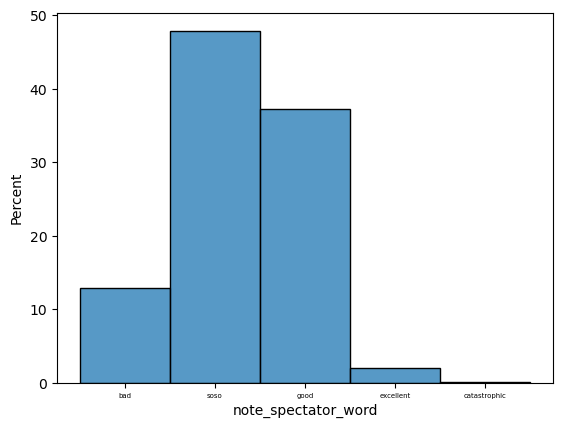

In [53]:
sn.histplot(data=df, x="note_spectator_word", stat="percent")

# Distribution movie ratings

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.


Text(0.5, 1.0, 'Distribution of Movie Ratings')

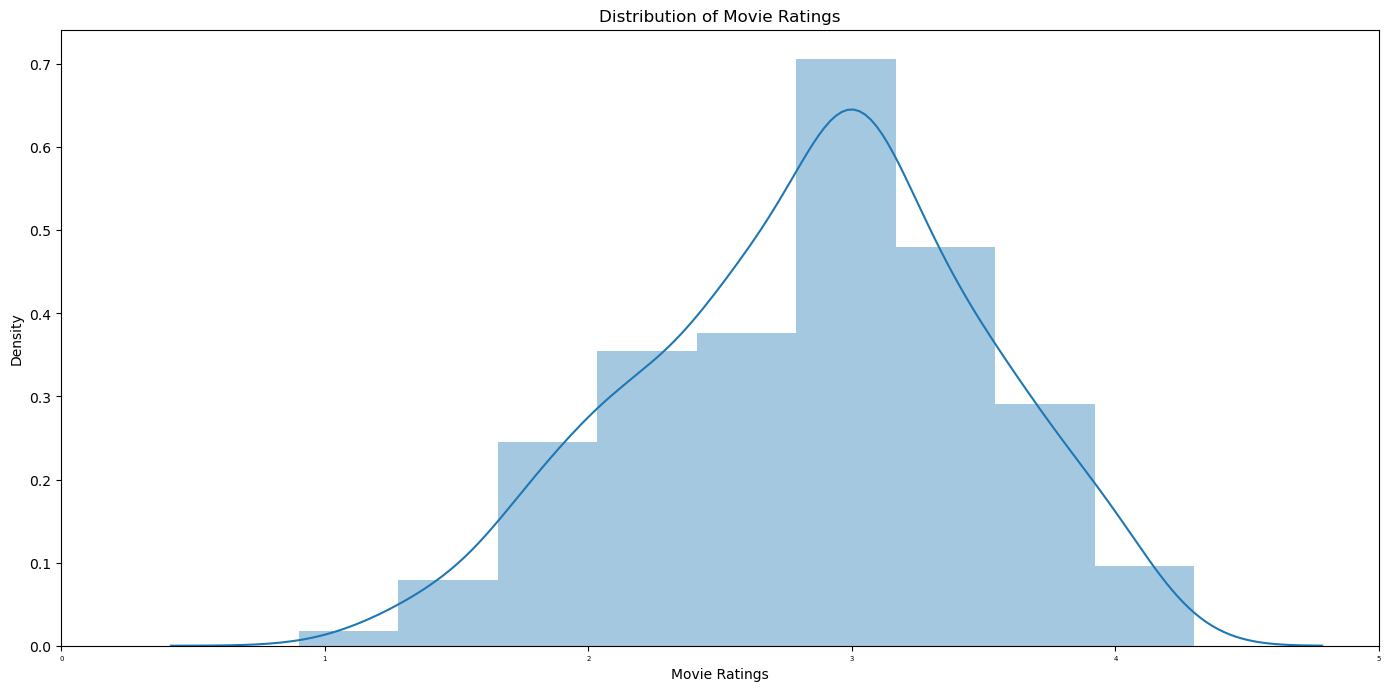

In [52]:
plt.figure(figsize=(17,8))
ax = sn.distplot(df['note_spectators'], bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='Movie Ratings')
ax.set(xlim=(0, 5))
ax.set_title("Distribution of Movie Ratings")